# 선형회귀
* 선형회귀 모델을 훈련시키는 두가지 방법

    - 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구함
    - 경사 하강법이라고 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용함수를 훈련 셋에 최소화 시키는 방법
    
## 정규 방정식
* 정규방정식 유도 정리: https://guru.tistory.com/44 
* $MSE(X,h_{\theta})=\frac{1}{m}\sum^m_{i=1}(\theta^Tx^{(i)}-y^{(i)})^2$
* 비용함수를 최소화하는 $x$ 값을 찾기위한 해석적인 방법이 있음
* $\hat{\theta}=(X^TX)^{-1}X^Ty$

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [60]:
X  = 2* np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100,1)

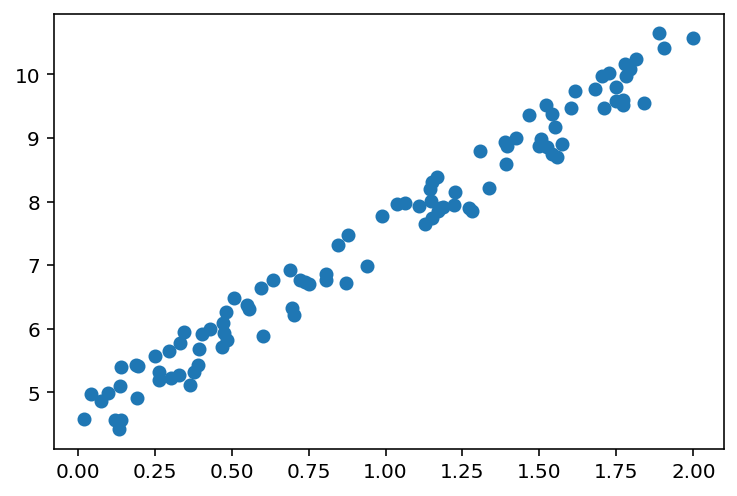

In [61]:
plt.scatter(X,y)

In [62]:
X_b = np.c_[np.ones((100,1)), X] #모든 샘플에 x0=1을 추가함  bias를 구하기 위한 초기값 추가

In [63]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [64]:
theta_best

array([[4.5385413 ],
       [3.00337596]])

In [65]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #모든 샘플에 x0=1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.5385413 ],
       [10.54529323]])

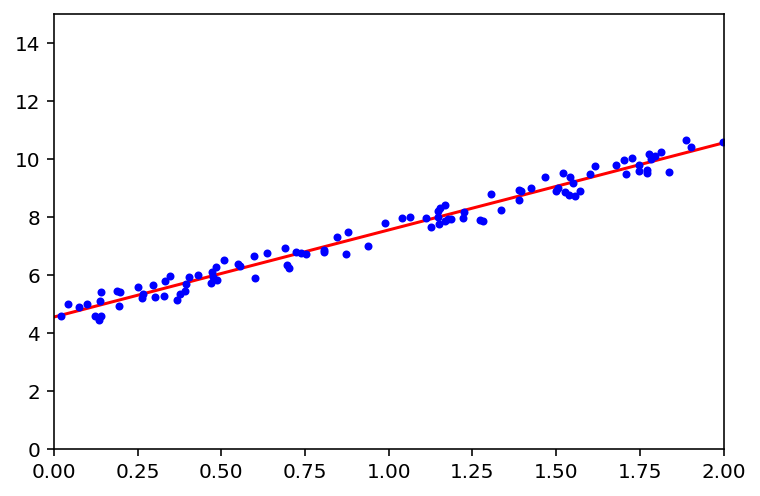

In [66]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

## 사이킷런에서의 선형회귀 수행

In [67]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.5385413]), array([[3.00337596]]))

In [68]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.5385413 ],
       [3.00337596]])

#  다항 회귀
* 비선형 데이터를 학습하는데 선형 모델을 사용할 수 있음
* 각 특성의 거듭제곱을 새로운 특성으로 추가하고 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시킴
* 간단한 2차 방정식으로 비선형 데이터를 생성해 보자

In [69]:
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + np.random.randn(m, 1)

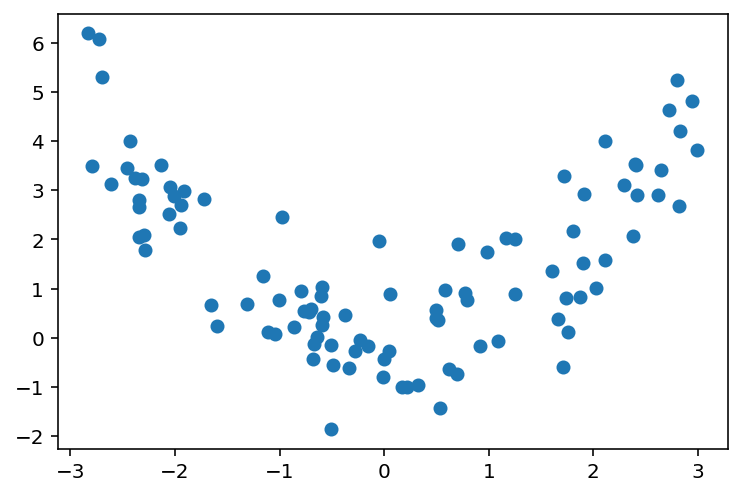

In [70]:
plt.scatter(X,y)

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.33129254])

In [72]:
X_poly[0]

array([-0.33129254,  0.10975474])

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.05466259]), array([[-0.09999547,  0.56100077]]))

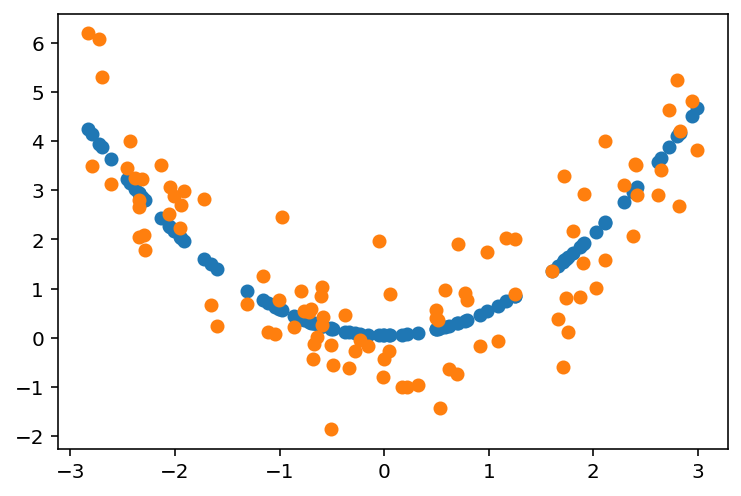

In [74]:
#y_predict= lin_reg.predict(X)
plt.scatter(X, 0.52*X**2 -0.012*X + 0.049)
plt.scatter(X,y)

![img](./img/img20.PNG)

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(fontsize=20)
    plt.ylim(0.0, 3.0)


## 과소적합 모델
* 복잡한 모델을 사용하거나 더 나은 특성을 사용해야만 해결 가능

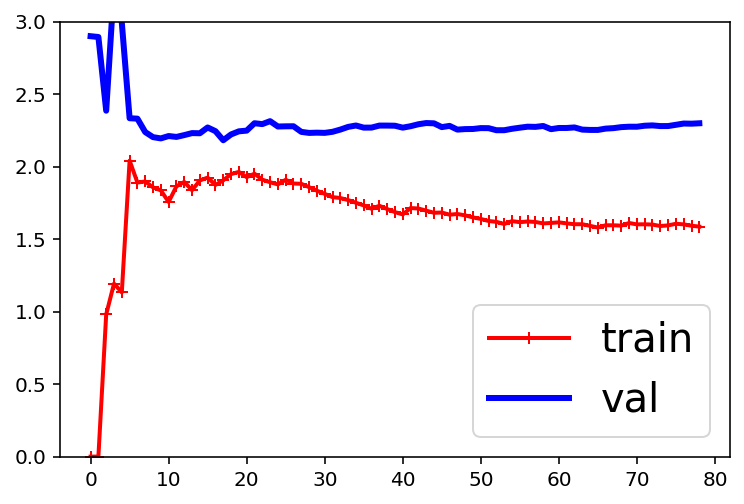

In [83]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

## 과대적합 모델
* 훈련데이터의 오차가 단순 선형 회귀 모델모다 훨씬 낮음
* 두 곡선사이의 공간이 있음(훈련 데이터에서의 모델 성능이 검증데이터보다 훨씬 낫다)
* 과대 적합 모델을 개선하는 방법은 검증 오차가 훈련 오차에 근접할 때까지 많은 훈련 데이터를 추가하는 것

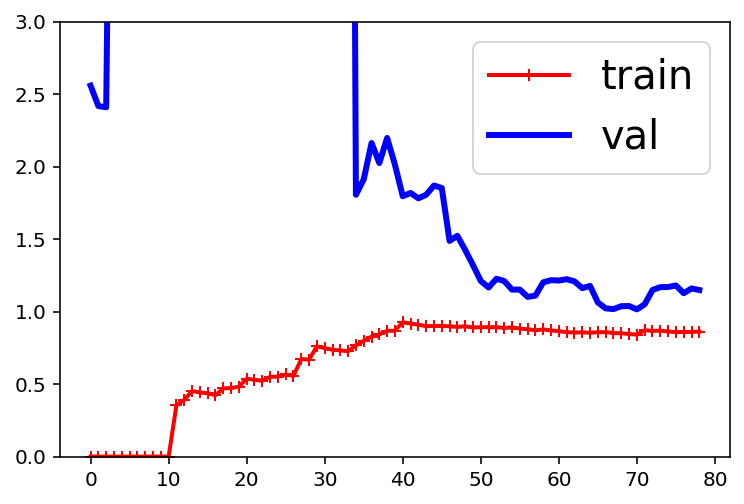

In [101]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plot_learning_curves(lin_reg,X_poly,y)

# 회귀 모델 예제
- 실제 키-몸무게 데이터를 사용하여 회귀 예측 모델을 만들어 본다
- 남여 성별 정보를 사용하여 성능의 개선되는 것을 확인한다

## 데이터 다운로드
- 남여 키, 몸무게 데이터

In [2]:
data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [3]:
print(data.shape)
data[:5]

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [5]:
# 단위 변환 (인치, 파운드 --> cm, kg)
data.Height = data.Height*2.54 # cm
data.Weight = data.Weight*0.453592 # kg
data[:5]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


In [77]:
# 사본 사용 (원본 백업)
df = data.copy()
df[:3]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550


## 데이터 특성

In [78]:
x = df.Height.values
y = df.Weight.values

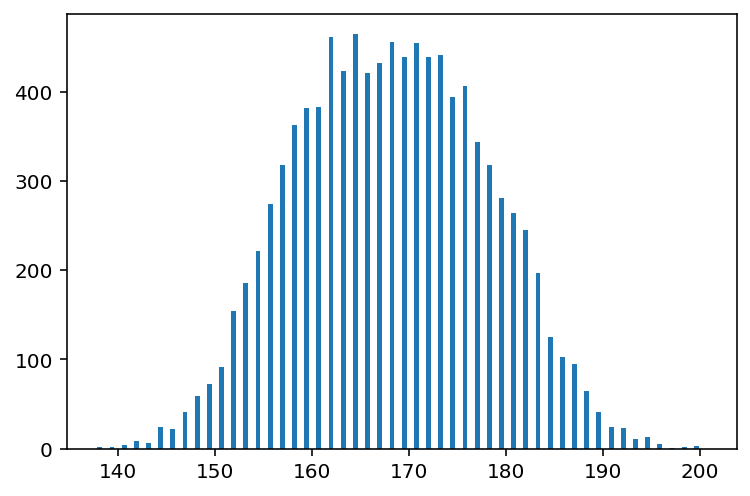

In [79]:
plt.hist(x, bins=50, width=0.5)
plt.show()

In [80]:
x.max()

200.65680555982956

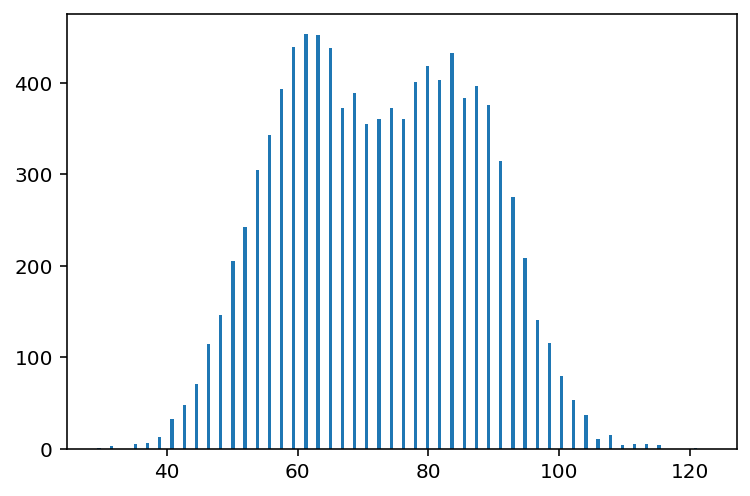

In [81]:
plt.hist(y, bins=50, width=0.5)
plt.show()

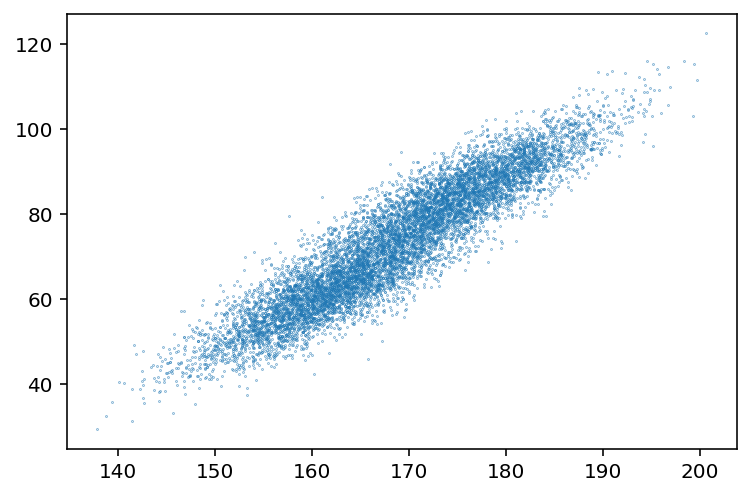

In [82]:
plt.scatter(x,y, s=0.05)

# 키로부터 몸무게 예측
- 성별 정보는 사용하지 않음. 즉, 남여를 구분하지 않는다

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [84]:
# 학습 및 검증 데이터 크기 확인
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((7500,), (2500,), (7500,), (2500,))

In [85]:
# 모델 생성, 학습, 사용 후 성능 보기 (R-Squared)
from sklearn.linear_model import LinearRegression
model = LinearRegression() # (1) 모델 생성
model.fit(x_train.reshape(-1,1), y_train) # (2) 학습
model.score(x_test.reshape(-1,1), y_test) # (3) 이용, 성능평가

0.8554962868708376

In [86]:
# 학습한 계수(파라미터)
a, b = model.coef_, model.intercept_
a, b

(array([1.37928798]), -159.29785928808383)

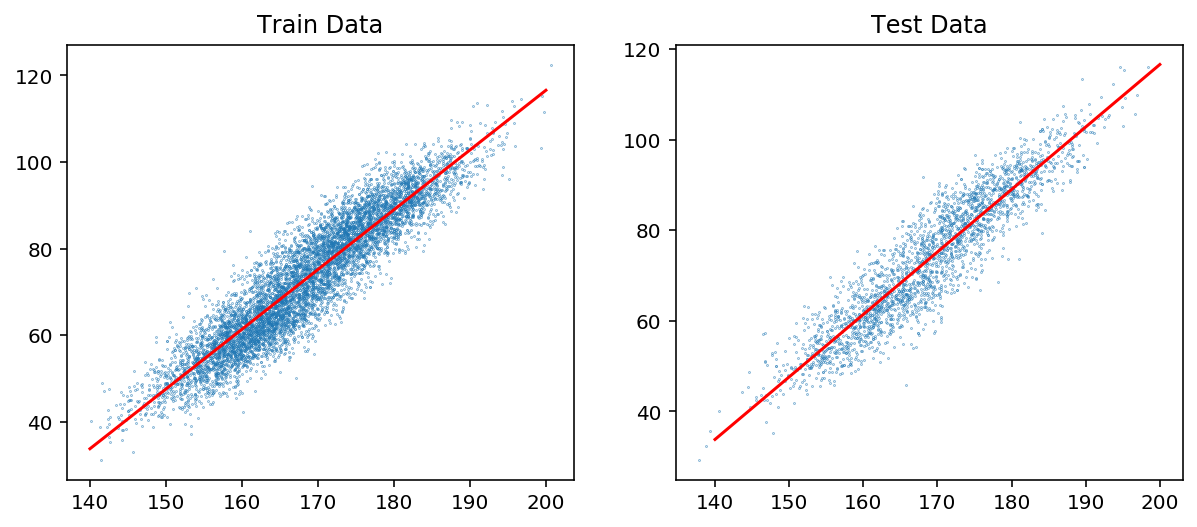

In [87]:
# 훈련과 검증 데이터에 대한 회귀 직선 보기
plt.figure(figsize=(10,4))
xs = np.linspace(140,200,2)
ys = a*xs + b

plt.subplot(1,2,1)  
plt.title('Train Data')
plt.plot(xs,ys, c='r')
plt.scatter(x_train,y_train, s=0.05)

plt.subplot(1,2,2)  
plt.title('Test Data')
plt.plot(xs,ys, c='r')
plt.scatter(x_test,y_test, s=0.05)

## 남여 구분 정보 사용
- 추가정보를 사용함으로써 (즉, 입력 데이터의 컬럼 수를 늘임으로써) 성능이 개선되는지 확인

In [88]:
df[:3]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550


In [89]:
# Gender 컬럼의 값 확인
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [90]:
sex = df.Gender.map({'Male':0, 'Female':1})
# 다른 방법 sex = df.Gender.apply(lambda x: 0 if x=="Male" else 1)
df.Gender = sex
df[:3]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550


In [91]:
sex

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Gender, Length: 10000, dtype: int64

## 키만 사용한 경우 (복습)
- 몸무게를 예측하는데 키만 사용하고 성별 정보는 사용하지 않는 경우
- 성능 평가는 R-Squared 값 보기

In [92]:
x = df.Height.values
y = df.Weight.values

x_train, x_test, y_train, y_test = train_test_split(x, y)
model = LinearRegression() # (1) 모델 생성
model.fit(x_train.reshape(-1,1), y_train)
model.score(x_test.reshape(-1,1), y_test)

0.8591513450678553

# 성별과 키, 두개의 컬럼을 사용
- 남여의 키-몸무게 관계가 다르므로 추가 정보 사용으로 성능이 개선될 것으로 예상
- 2차원 배열 구조를 가지므로 소문자 x 대시 대문자 X를 사용한다
 - 2차원 배열을 사용하므로 reshape(-1,1)이 필요 없다

In [93]:
X = df[["Gender", "Height"]]
y = df.Weight.values

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression() 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9033634088324528

In [94]:
X[:3]

,Gender,Height
0,0,187.571423
1,0,174.706036
2,0,188.239668


- 성별 정보를 추가로 사용하여 성능이 개선되었다

## 다중 회귀 모델
- 입력 변수가 2개인 다중회귀 모델이므로 파라미터가 변수의 수만큼 자동으로 2개 만들어진다
- $\hat{y} = b +a_{1}x_{1} + a_{2}x_{2}$
- $x_{1}$: 성별, $x_{2}$: 키

In [95]:
print(model.coef_)
print(model.intercept_)

[-8.84796236  1.06497669]
-101.93941535781258


In [96]:
a1, a2 = model.coef_[0], model.coef_[1]
b1 = model.intercept_

## 회귀직선
- (1)남성의 경우 회귀 직선 (Gender=0, 갈색 점): 파란색 선
- (2)여성의 경우 회귀 직선 (Gender=1, 노란색 점): 붉은색 선
- (3)성별을 구분하지 않는 전체 대상의 회귀직선: 검정색

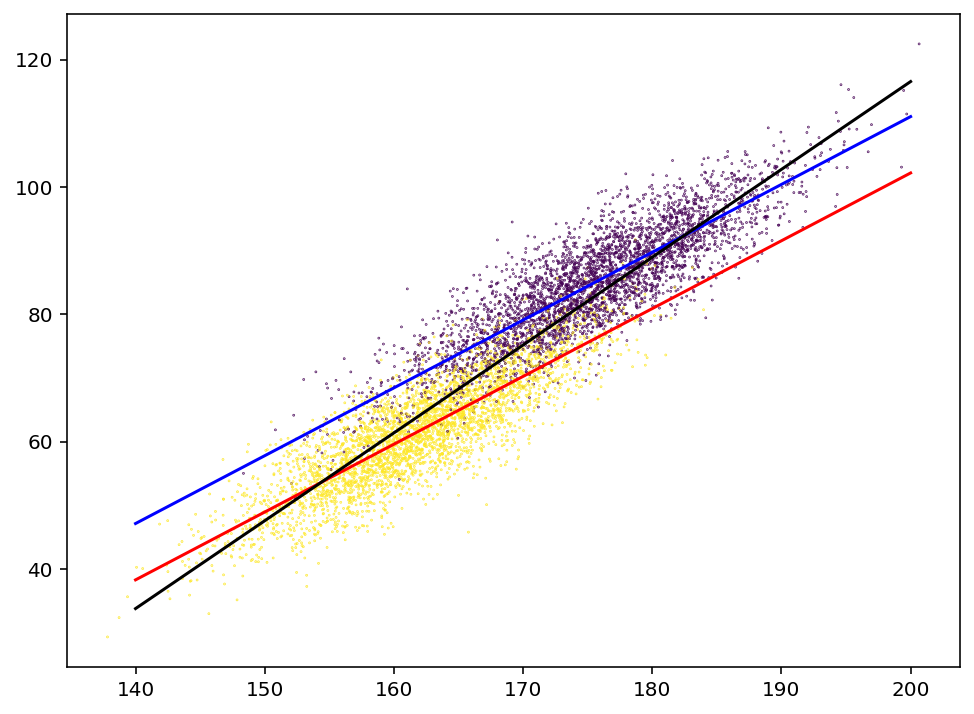

In [97]:
xs = np.linspace(140,200,2)
plt.figure(figsize=(8,6))
plt.scatter(X_train.Height, y_train, c=X_train.Gender, s=0.1)

# 남성의 경우 회귀 직선 (Gender=0)
ys = a1*0 + a2*xs + b1
plt.plot(xs, ys, c='b')

# 여성의 경우 회귀 직선 (Gender=1)
ys = a1*1 + a2*xs + b1
plt.plot(xs, ys, c='r')

# 남여 구분 없는 경우 회귀 직선 (a, b 파라미터 사용)
ys = a*xs + b
plt.plot(xs, ys, c='k')

- 다른 카테고리 변수 추가

In [99]:
df[:3]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550


In [100]:
df["Nation"] = np.random.choice(["China","Korea","Japan"], 10000)
df[:10]

,Gender,Height,Weight,Nation
0,0,187.571423,109.720985,Korea
1,0,174.706036,73.622732,Korea
2,0,188.239668,96.497550,Korea
3,0,182.196685,99.809504,Korea
4,0,177.499761,93.598619,Korea
5,0,170.822660,69.042216,Japan
6,0,174.714106,83.428219,China
7,0,173.605229,76.190352,China
8,0,170.228132,79.800187,China
9,0,161.179495,70.941642,Korea


In [101]:
df.Nation.value_counts()

Korea    3413
China    3339
Japan    3248
Name: Nation, dtype: int64

In [102]:
df_nat = pd.get_dummies(df["Nation"])
df_nat[:3]

,China,Japan,Korea
0,0,0,1
1,0,0,1
2,0,0,1


In [103]:
df = df.join(df_n)
df[:3]

,Gender,Height,Weight,Nation,China,Japan,Korea
0,0,187.571423,109.720985,Korea,0,1,0
1,0,174.706036,73.622732,Korea,0,1,0
2,0,188.239668,96.497550,Korea,0,0,1


In [104]:
data[:3]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550


In [105]:
pd.get_dummies(data.Gender)

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,1,0
9996,1,0
9997,1,0
9998,1,0


## 기타 성능 평가
- MAE, RMSE 값은 각각 mean_absolute_error, mean_squared_error 함수가 제공한다

In [106]:
y_pred = model.predict(X_test)

In [107]:
# MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, y_pred)

3.633129097352219

In [109]:
# RMSE 를 얻으려면 squared=False 를 설정한다
mean_squared_error(y_test, y_pred, squared=False)

4.578409817362492

In [110]:
error = np.abs(y_pred-y_test)
error.max()

17.438196005504523

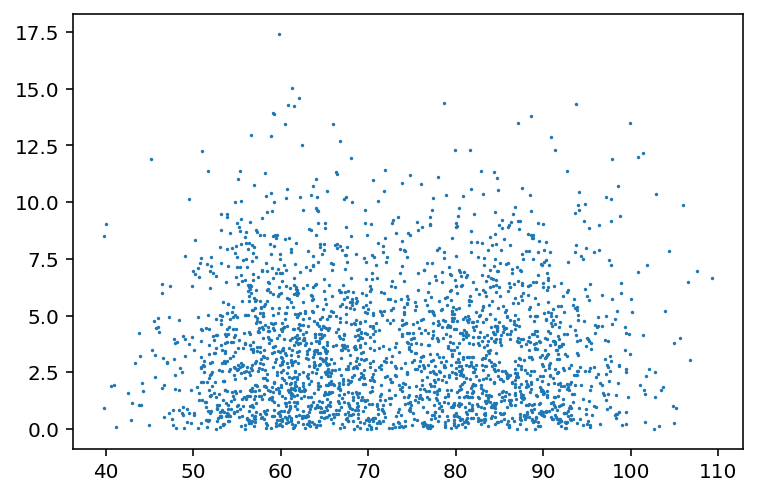

In [112]:
plt.scatter(y_pred, error, s=0.5)

# 경사하강법
* 경사 하강법은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
* 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정함
## 배치 경사하강법
* 경사하강법을 구현하려면 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 그라디언트를 계산해야함
* 다시 말해 $\theta_j$가 조금 변경될때 비용함수가 얼마나 바뀌는지 계산해야 함
* 배치 경사하강법은 __매 경사 하강법 스텝에서 전체 훈련세트 X에 대해 계산__함
* 비용함수의 미분
* $\frac{\partial}{\partial\theta_j}MSE(\theta)= \frac{2}{m}\sum^m_{i=1}(\theta^Tx^{(i)}-y^{(i)})x^{(i)}_j$
* 미분을 각각 계산할 필요 없이 아래의 식으로 한꺼번에 계산 가능함
* $\nabla_\theta MSE(\theta)=\frac{2}{m}X^T(X^\theta-y)$
* 경사 하강법의 스텝
$\theta_{(i=1)}=\theta_i-\eta\nabla_\theta MSE(\theta) $

![image](./img/img18.jpg)

In [85]:
eta= 0.1 #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta -eta * gradients

In [86]:
theta

array([[1.38225243],
       [0.16845504]])

## 확률적 경사하강법
* 배치 경사 하강법의 문제는 매 스텝에서 전체 훈련 세트를 사용해서 그라디언트를 계산해야한다는 것(훈련 세트가 커지면 매우 느려짐)
* 반면 __확률적 경사하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그라디언트를 계산__함 
* 매 스텝에서 다루어야할 데이터가 매우 적기때문에 알고리즘이 훨씬 빠름
* 매 스텝에서 하나의 샘플만 메모리에 올라가 있으면 되므로 매우 큰 훈련 데이터도 학습이 가능함
* 대신 확률적 경사하강법은 무작위로 데이터 한개만을 선택하기에 배치 경사하강법보다 불안정함
* 비용 함수가 매우 불규칙적일때, 알고리즘이 지역 최솟값을 벗어날 수 있도록 해주기 때문에 확률적 경사하강법의 성능이 더 좋음
* 무작위성은 지역 최솟값에 탈출시켜주기에 좋지만, 전역 최솟값에 다다르지 못하게 한다는 점에서 좋지 않음
* 이를 해결할 수 있는 방법에는 학습률을 점진적으로 감소시키는 방법이 있음(시작 시 학습률을 크게하고 점진적으로 감소시킴)

![image](./img/img19.PNG)

In [87]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼 파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [88]:
theta

array([[1.42342568],
       [0.14914999]])

## 사이킷런에서 SGD 방식으로 선형회귀 사용하기

In [89]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [90]:
sgd_reg.intercept_, sgd_reg.coef_

(array([1.64226251]), array([0.00675857]))

# 규제가 있는 선형 모델
* 과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것
* 다항회귀모델을 규제하는 간단한 방법은 모델의 차수를 줄이는 것
## 릿지 회귀(L2 Regression)
* 규제항이 비용 함수에 추가됨
* 학습 알고리즘을 데이터에 맞추는 것 뿐만아니라 모델의 가중치가 가능한 작게 유지되도록 노력함
* 편향인 $\theta_0$는 규제되지 않음
$J(\theta)= MSE(\theta)+ \alpha\frac{1}{2}\sum^n_{(i=1)}\theta^2_i$
* 수식의 뒤에 있는 패널티항을 보면 파라미터들의 제곱을 더해주는 것으로 미분 가능하기에 최적화가 가능하고, 파라미터의 크기가 작은 것보다 큰것을 빠른 속도로 줄여줌
![img](./img/img21.PNG)

In [94]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.49347379]])

In [95]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.45494449])

# 조기 종료
* 학습곡선을 모니터링하여 기준 오차 보다 작은 값을 가질 때 훈련을 멈추는 규제
* 훈련을 할수록 훈련 데이터에 과대 적합이 발생하여 오차가 증가할 수 있을 때 사용
![img](./img/img22.PNG)